In [2]:
# IMPORT PACKAGES
import matplotlib.pyplot as plt # Data visualization
import numpy as np # Linear algebra
import os # OS interfacing
import pandas as pd # Dataframe manipulation
import shutil # File operations
import sklearn.datasets as datasets # Datasets
import torch # Tensors
import torch.optim as optimizers # Neural network optimizers
import torch.nn as nn # Neural network layers
import torch.nn.functional as functions # Layer functions (e.g., ReLU, Softmax)

In [3]:
# DATA INESTION
rawData = pd.read_csv("../assets/Datasets/moons.csv", sep = ',')

# DATA WRANGLING
X = torch.tensor(rawData[['x', 'y']].to_numpy()).float()
y = torch.tensor(rawData['cluster'].to_numpy())
data = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X, y), 
	shuffle = True)
del(X, y)

In [46]:
class NeuralNetwork(nn.Module):
	def __init__(self):
		super(NeuralNetwork, self).__init__()
		self.fc1 = nn.Linear(2, 100) # Entry to Output
		#self.fc2 = nn.Linear(10, 10)
		#self.fc3 = nn.Linear(10, 10)
		#self.fc4 = nn.Linear(10, 10)
		#self.fc5 = nn.Linear(10, 10)
		self.fc6 = nn.Linear(100, 2)

	def forwardPropagation(self, x):
		x = functions.sigmoid(self.fc1(x))
		#x = functions.sigmoid(self.fc2(x))
		#x = functions.sigmoid(self.fc3(x))
		#x = functions.sigmoid(self.fc4(x))
		#x = functions.sigmoid(self.fc5(x))
		x = self.fc6(x)
		return x
	
	def train(self, trainingData: torch.utils.data.dataloader.DataLoader, 
		numberOfEpochs: int, costFunction: torch.nn.modules.loss, 
		optimizer: torch.optim.Optimizer, learningRate: float):

		optimizer = optimizer(self.parameters(), learningRate)
		costs = np.zeros(numberOfEpochs) # Store overall cost at each epoch

		if os.path.exists("contourfigs/") and os.path.isdir("contourfigs/"):
			shutil.rmtree("contourfigs")
		
		os.mkdir("contourfigs/")

		for epoch in range(numberOfEpochs):

			# Generate decision boundary matrices
			with torch.no_grad():
				# Generate grid domain
				x = np.linspace(rawData['x'].min() - 1, rawData['x'].max(), num = 100)
				y = np.linspace(rawData['y'].min() - 1, rawData['y'].max(), num = 100)
				x, y = np.meshgrid(x, y)
				inputSpace = torch.tensor(np.vstack([x.flatten(), y.flatten()]).T)

				# Compute predicted class probabilities
				outputSpace = self.predict(inputSpace.float()).numpy()
				outputSpace = np.max(outputSpace, axis = 1).reshape(x.shape[0], x.shape[0])

				# Created melted data frame
				# currentEpoch = np.ones((x.shape[0] * y.shape[0], 1)) * (epoch + 1)
				# decisionBoundary = np.hstack([x.reshape(-1, 1), y.reshape(-1, 1), outputSpace, currentEpoch])
				# decisionBoundaries.append(decisionBoundary)
	
				plt.contourf(x, y, outputSpace, cmap = "RdBu")
				plt.scatter(rawData['x'], rawData['y'], c = rawData['cluster'], cmap = "RdBu")
				plt.savefig("contourfigs/" + str(epoch) + ".png", dpi = 300)
				#plt.show()

			optimizer.zero_grad() # Remove gradients from previous backprop
			cost = 0.0 # Not sure if this is needed because of zero_grad()
			for observation in trainingData:
				X, label = observation
				prediction = self.forwardPropagation(X.view(-1, 2))
				loss = costFunction(prediction, label)
				cost += loss

			costs[epoch] = cost
			print("Cost: ", costs[epoch])
			cost.backward()
			optimizer.step()

	def predict(self, x: torch.tensor):
		with torch.no_grad():
			return(self.forwardPropagation(x))

Cost:  353.79864501953125
Cost:  893.2164916992188
Cost:  468.13494873046875
Cost:  481.77239990234375
Cost:  182.50738525390625
Cost:  250.45819091796875
Cost:  337.3398742675781
Cost:  281.96630859375
Cost:  208.42788696289062
Cost:  190.47450256347656
Cost:  213.24322509765625
Cost:  235.31427001953125
Cost:  229.06971740722656
Cost:  198.81764221191406
Cost:  167.4006805419922
Cost:  151.7324676513672
Cost:  153.6248016357422
Cost:  162.637451171875
Cost:  163.608642578125
Cost:  150.98582458496094
Cost:  135.44961547851562
Cost:  133.518310546875
Cost:  147.4779510498047
Cost:  159.3368682861328
Cost:  154.5628662109375
Cost:  142.10543823242188
Cost:  137.7444305419922
Cost:  142.2041473388672
Cost:  145.24420166015625
Cost:  140.8711700439453
Cost:  132.729248046875
Cost:  128.17247009277344
Cost:  129.80271911621094
Cost:  133.44749450683594
Cost:  133.91629028320312
Cost:  130.91896057128906
Cost:  128.1591339111328
Cost:  128.18482971191406
Cost:  129.94935607910156
Cost:  13

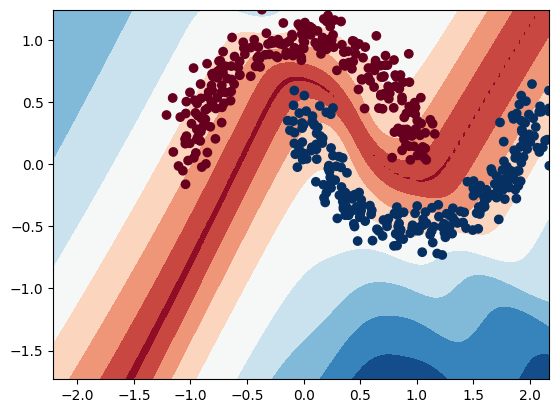

In [47]:
network = NeuralNetwork()
network.zero_grad()
network.train(data, 400, nn.CrossEntropyLoss(), optimizers.Adam, 0.1)